In [1]:
import numpy as np #숫자 다루는 라이브러리(수치 연산, 벡터 연산 등)
import pandas as pd #데이터프레임 쉽게 다룰 수 있게 해주는 라이브러리
import matplotlib.pyplot as plt  
import seaborn as sns   #위, 아래는 데이터를 시각화 할 수 있는 라이브러리

plt.style.use('seaborn')  #시각화할 때 그림 스타일 자기가 선호하는 것고르기
sns.set(font_scale=2.5)  #크게 나옴

import missingno as msno  #null 데이터 쉽게 볼 수 있음, 편해서 씀

import warnings
warnings.filterwarnings('ignore') #matplotlib으로 그리고 show하면 새롭게 창 뜨면서 볼 수 있게 됨는데 inline하면 바로 볼 수 있음

%matplotlib inline

머신러닝 하려면 sklearn 반드시 쓸 줄 알아야 함.


책 사서 공부하기


pandas 이용해서 데이터분석 할 것

In [2]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
train_data.shape

(891, 12)

In [6]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
for col in train_data.columns: 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (train_data[col].isnull().sum() / train_data[col].shape[0]))
    print(msg)   #칼럼 별로 null값 얼마나 있는지 백분율로 나타낸 것

column: PassengerId	 Percent of NaN value: 0.00%
column:   Survived	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 19.87%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.00%
column:      Cabin	 Percent of NaN value: 77.10%
column:   Embarked	 Percent of NaN value: 0.22%


In [8]:
col

'Embarked'

In [9]:
train_data[col].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Name: Embarked, Length: 891, dtype: bool

In [10]:
train_data[col].isnull().sum() #True가 2개 있다는 것  #null이 2개라는 것

2

판다스의 기본 객체는 시리즈(index와 value로 이루어진 것)

In [11]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [12]:
train_data[col].isnull().sum() / train_data[col].shape[0]  #이런 식으로 아래 백분율 나오는 것임

0.002244668911335578

In [13]:
test_data.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [14]:
for col in test_data.columns: 
    msg = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 * (test_data[col].isnull().sum() / test_data[col].shape[0]))
    print(msg)   #칼럼 별로 null값 얼마나 있는지 백분율로 나타낸 것

column: PassengerId	 Percent of NaN value: 0.00%
column:     Pclass	 Percent of NaN value: 0.00%
column:       Name	 Percent of NaN value: 0.00%
column:        Sex	 Percent of NaN value: 0.00%
column:        Age	 Percent of NaN value: 20.57%
column:      SibSp	 Percent of NaN value: 0.00%
column:      Parch	 Percent of NaN value: 0.00%
column:     Ticket	 Percent of NaN value: 0.00%
column:       Fare	 Percent of NaN value: 0.24%
column:      Cabin	 Percent of NaN value: 78.23%
column:   Embarked	 Percent of NaN value: 0.00%


알고리즘에 따라  null 데이터 채워줘야 함.

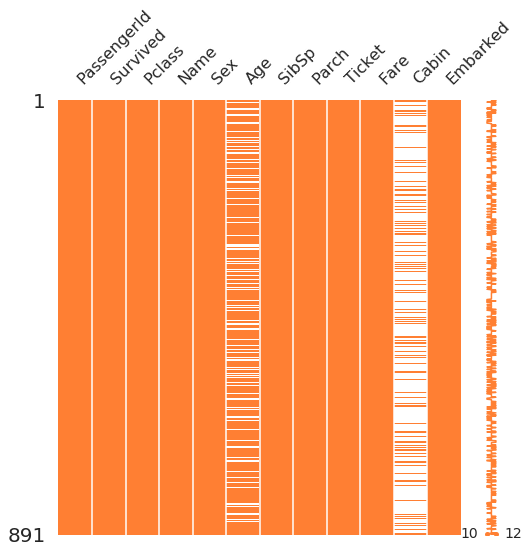

In [15]:
msno.matrix(df=train_data.iloc[:, :], figsize=(8, 8), color = (1, 0.5, 0.2))

빈칸이 null에 해당하는 것

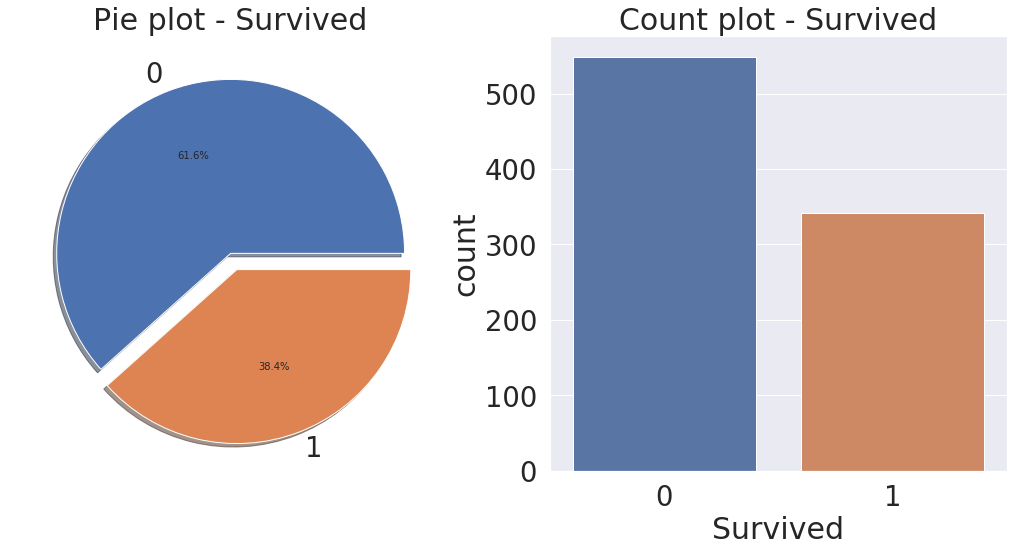

In [16]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))  #pyplot으로 그림 그릴 때 도화지 까는 과정 #1행 2열 #sub-> 하위 부분부분

train_data['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Pie plot - Survived')
ax[0].set_ylabel('')
sns.countplot('Survived', data = train_data, ax=ax[1])
ax[1].set_title('Count plot - Survived') 
plt.show()

코드 어떤 의미인지 잘 모르겠으면 하나하나씩 실행해보기

In [17]:
ax  #ax는 2개임

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7b1176217240>,
      dtype=object)

In [18]:
891 * 38.4  #이 만큼 살아남음

34214.4

In [19]:
train_data['Survived'].value_counts() #시리즈 -> 시리즈는 plot을 가짐

0    549
1    342
Name: Survived, dtype: int64

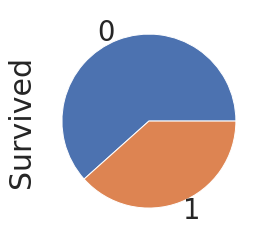

In [20]:
train_data['Survived'].value_counts().plot.pie() #파이로 표현 #이렇게 보명 어려우니까 짼다(explode) 나온 것

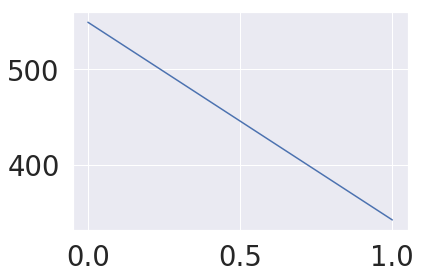

In [21]:
plt.plot(train_data['Survived'].value_counts())  #위에랑 같은 것임

In [22]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [23]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).count()  #그룹 별로 생존 몇 개 있는지

,Survived
Pclass,
1,216
2,184
3,491


In [24]:
train_data[['Pclass', 'Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
...,...,...
886,2,0
887,1,1
888,3,0
889,1,1


In [25]:
train_data['Survived'].unique()

array([0, 1])

In [26]:
pd.crosstab(train_data['Pclass'], train_data['Survived'], margins = True)  #이걸 보면 위에 꺼 해석 가능

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


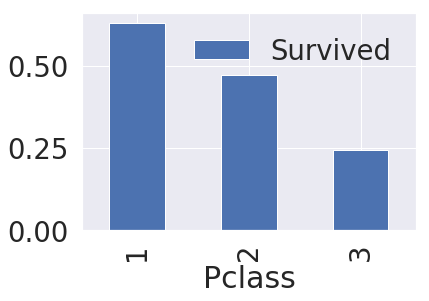

In [27]:
train_data[['Pclass', 'Survived']].groupby(['Pclass'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar()

In [29]:
pd.crosstab(train_data['Pclass'], train_data['Survived'], margins=True).style.background_gradient()

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


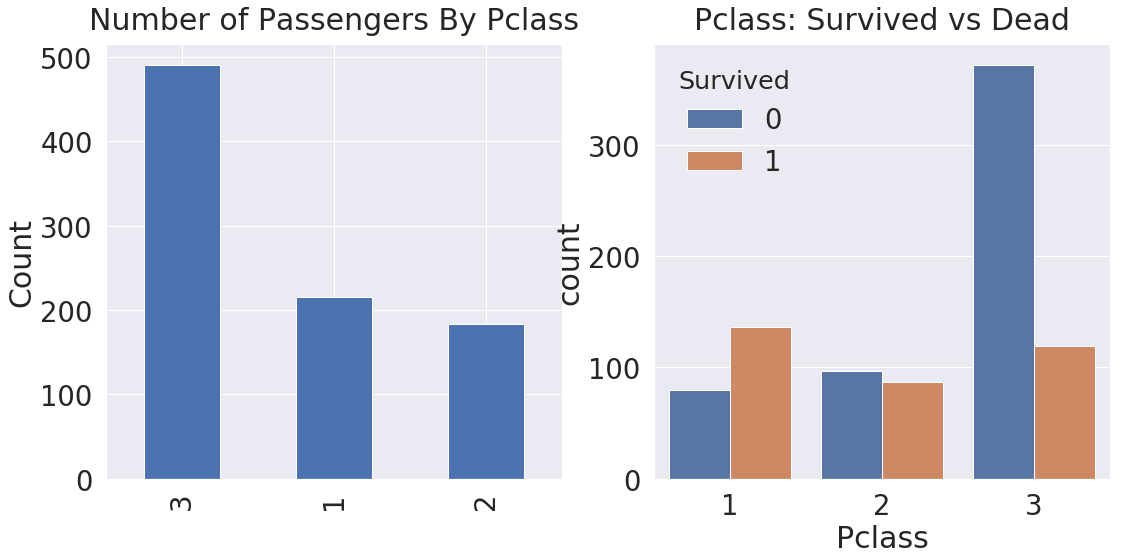

In [30]:
y_position = 1.02
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train_data['Pclass'].value_counts().plot.bar(ax=ax[0])
ax[0].set_title('Number of Passengers By Pclass', y=y_position)
ax[0].set_ylabel('Count')
sns.countplot('Pclass', hue='Survived',data=train_data, ax=ax[1])
ax[1].set_title('Pclass: Survived vs Dead', y=y_position)
plt.show()

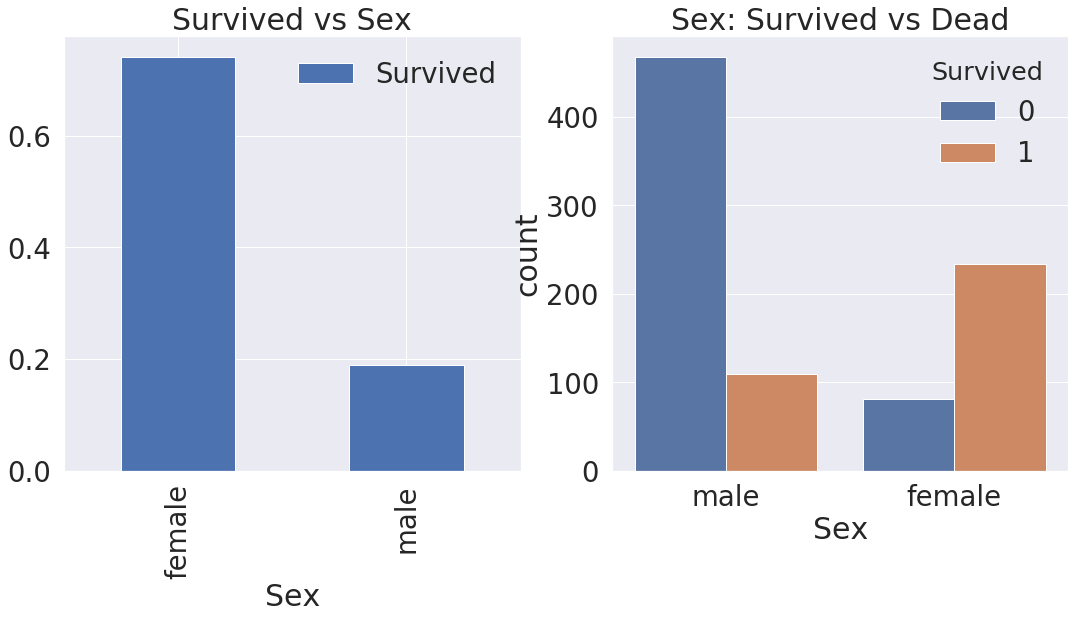

In [34]:
f, ax = plt.subplots(1, 2, figsize=(18, 8)) # subplot : 그래프 2개 (여러개 작성할 때 사용)
train_data[['Sex', 'Survived']].groupby(['Sex'], as_index=True).mean().plot.bar(ax=ax[0])
ax[0].set_title('Survived vs Sex')

sns.countplot('Sex', data = train_data, ax=ax[1], hue='Survived') #hue-> 색깔 구분하는 
ax[1].set_title('Sex: Survived vs Dead')
plt.show()

In [35]:
train_data[['Sex','Survived']].groupby(['Sex'],as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [36]:
pd.crosstab(train_data['Sex'], train_data['Survived'], margins = True).style.background_gradient(cmap='Blues')

Survived,0,1,All
Sex,,,
female,81,233,314
male,468,109,577
All,549,342,891


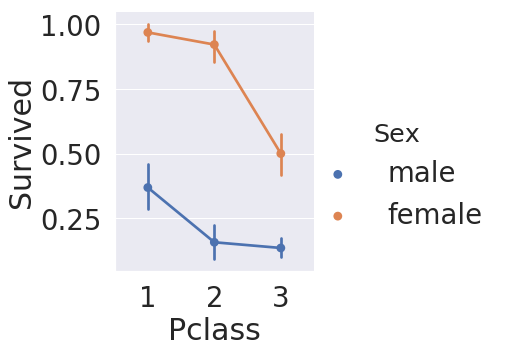

In [37]:
sns.factorplot('Pclass', 'Survived', hue='Sex', data=train_data)

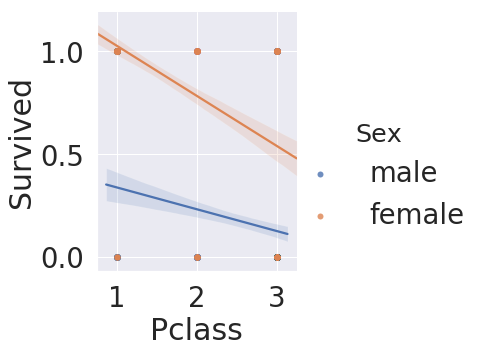

In [39]:
sns.lmplot(data = train_data, x= 'Pclass', y = 'Survived',hue='Sex')

In [45]:
print(train_data['Age'].max())
print(train_data['Age'].min())
print(train_data['Age'].mean())

80.0
0.42
29.69911764705882


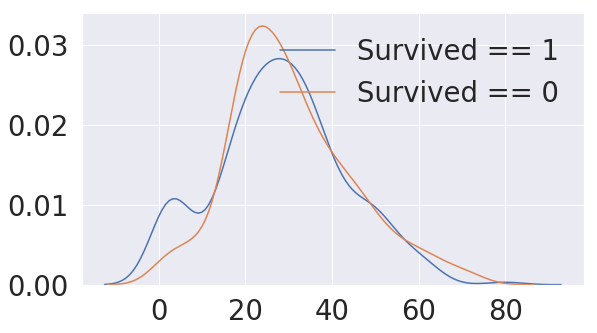

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
sns.kdeplot(train_data[train_data['Survived'] == 1]['Age'], ax=ax) #kdeplot-> 커널의 밀도 측정 함수
sns.kdeplot(train_data[train_data['Survived'] == 0]['Age'], ax=ax)
plt.legend(['Survived == 1', 'Survived == 0'])

plt.show()

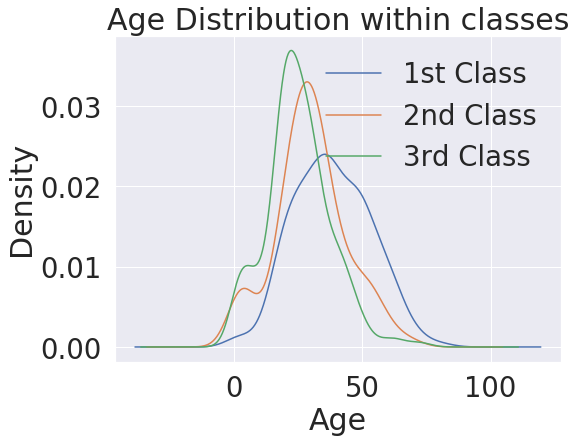

In [49]:
plt.figure(figsize=(8, 6))
train_data['Age'][train_data['Pclass'] == 1].plot(kind='kde')
train_data['Age'][train_data['Pclass'] == 2].plot(kind='kde')
train_data['Age'][train_data['Pclass'] == 3].plot(kind='kde')

plt.xlabel('Age')
plt.title('Age Distribution within classes')
plt.legend(['1st Class', '2nd Class', '3rd Class'])

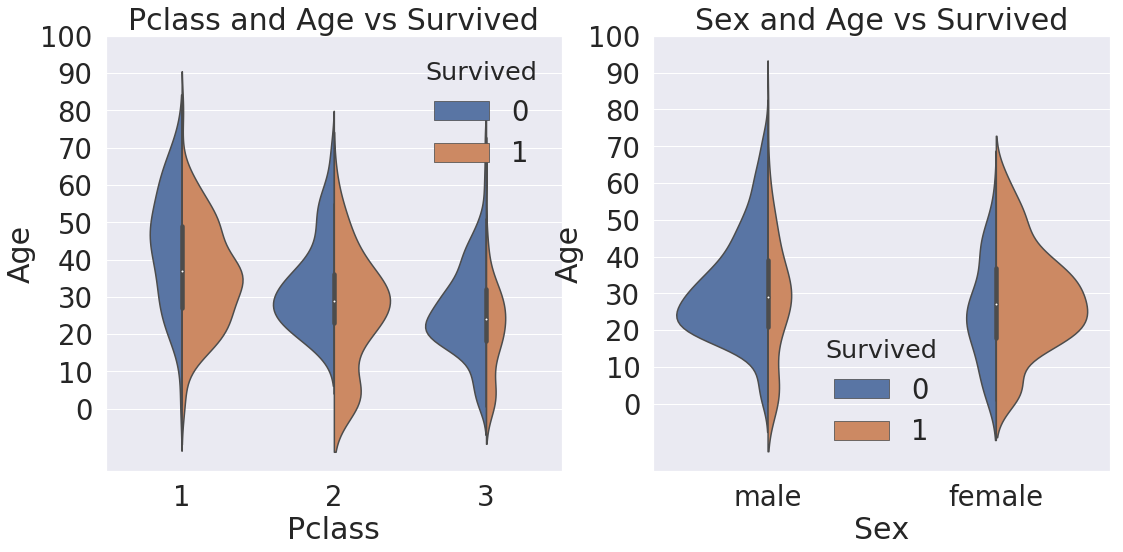

In [50]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.violinplot(x = "Pclass",y = "Age", hue="Survived", data=train_data, scale='count', split=True,ax=ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot(x = "Sex",y = "Age", hue="Survived", data=train_data, scale='count', split=True,ax=ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
plt.show()

In [51]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1 #+1: 자기자신 포함
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1 

In [52]:
print("Maximum size of Family: ", train_data['FamilySize'].max())
print("Minimum size of Family: ", train_data['FamilySize'].min())

Maximum size of Family:  11
Minimum size of Family:  1


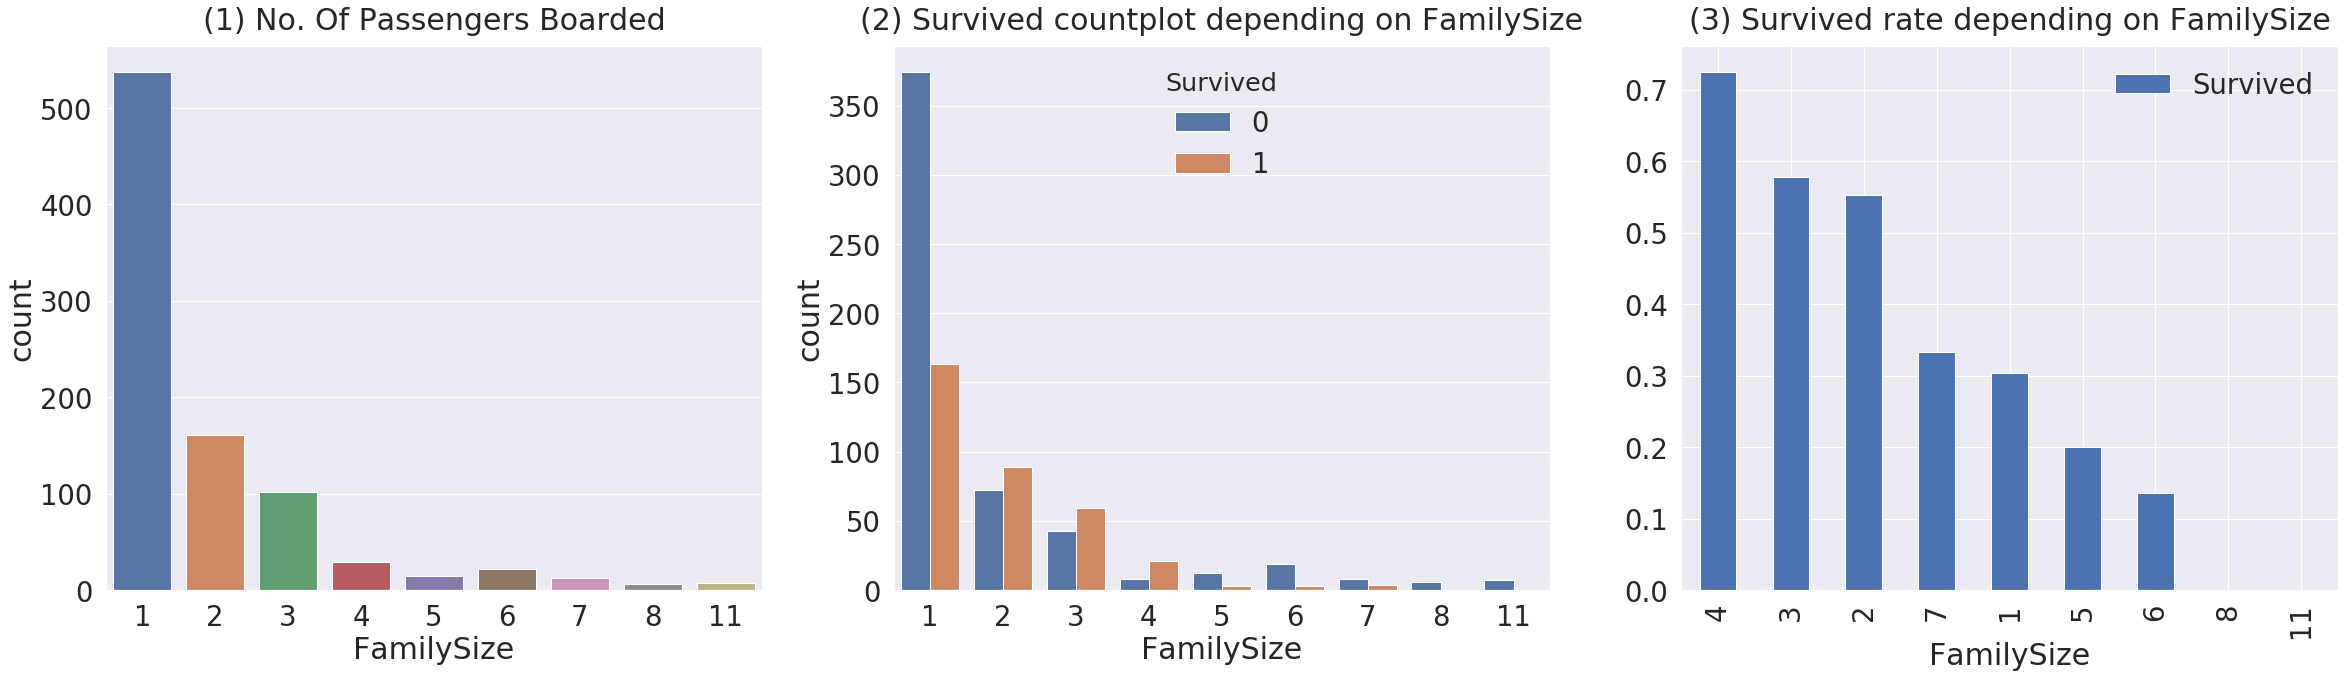

In [53]:
f,ax=plt.subplots(1, 3, figsize=(40,10))
sns.countplot(x = 'FamilySize', data=train_data, ax=ax[0])
ax[0].set_title('(1) No. Of Passengers Boarded', y=1.02)
sns.countplot(x = 'FamilySize', hue = 'Survived', data=train_data, ax=ax[1])
ax[1].set_title('(2) Survived countplot depending on FamilySize',  y=1.02)

train_data[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=True).mean().sort_values(by='Survived', ascending=False).plot.bar(ax=ax[2])
ax[2].set_title('(3) Survived rate depending on FamilySize',  y=1.02)

plt.subplots_adjust(wspace=0.2, hspace=0.5)

plt.show()

In [54]:
train_data['Ticket'].value_counts()

1601        7
CA. 2343    7
347082      7
347088      6
3101295     6
           ..
244361      1
349216      1
2695        1
244373      1
113510      1
Name: Ticket, Length: 681, dtype: int64

데이터 전처리 -> null값 처리하기
===

In [55]:
train_data['Age'].isnull().sum()

177

In [56]:
train_data['Age'].mean() #6살 짜리 아이를 30살이라고 할 수 없으니 구체적인 방법(그룹화)으로 나이 구해

29.69911764705882

In [57]:
train_data['Name'] #사람 일일이 데이터 뽑아내는 건 

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [58]:
train_data['Name'].str.extract('([A-Za-z]+)\.')  #정규표현식에 맞는 형태로 출력해줌

,0
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr
...,...
886,Rev
887,Miss
888,Miss
889,Mr


In [61]:
test_data['Initial'] = test_data['Name'].str.extract('([A-Za-z]+)\.') #test도 train과 같이

In [62]:
pd.crosstab(train_data['Initial'], train_data['Sex'])

Sex,female,male
Initial,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [63]:
train_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)  #1대1로 바꿔주는 것, inplace 빼면 적용이 안됨

In [64]:
test_data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

In [65]:
train_data.groupby('Initial').mean()  #initial 그룹별로 평균치 나옴

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize
Initial,,,,,,,,
Master,414.975000,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125,4.675000
Miss,411.741935,0.704301,2.284946,21.860000,0.698925,0.537634,43.937188,2.236559
Mr,455.880907,0.162571,2.381853,32.739609,0.293006,0.151229,24.939822,1.444234
Mrs,456.393701,0.795276,1.984252,35.981818,0.692913,0.818898,45.420603,2.511811
Other,564.444444,0.111111,1.666667,45.888889,0.111111,0.111111,19.102778,1.222222


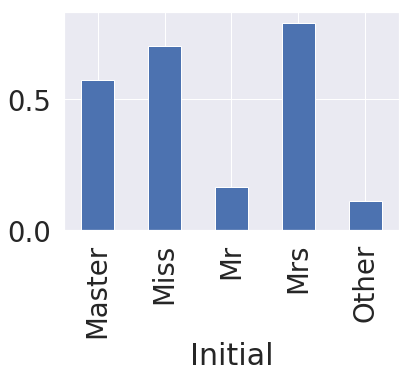

In [66]:
train_data.groupby('Initial')['Survived'].mean().plot.bar()  #initial 그룹(성별) 별로 생존률 보여줌

train에서 얻은 수치로 test 데이터들을 채우는 것!
--


null데이터 가져와서 특정 값으로 채워주기

In [68]:
train_data.loc[(train_data['Age'].isnull()), :]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Initial
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,1,Mr
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S,1,Mr
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C,1,Mrs
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C,1,Mr
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q,1,Miss
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C,1,Mr
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S,11,Miss
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S,1,Mr
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S,1,Mr


In [75]:
train_data['Age'].isnull()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888     True
889    False
890    False
Name: Age, Length: 891, dtype: bool

In [71]:
train_data.loc[(train_data['Age'].isnull()) & (train_data['Initial'] == 'Mr'), 'Age'] = 33 #우리가 원하는 값으로 채워주기(Mr의 평균 나이)

In [73]:
train_data.loc[(train_data['Initial'] == 'Mr'), 'Age'].isnull().sum() #null 데이터 있는지 없는지 확인하기

0

In [76]:
train_data.loc[(train_data['Age'].isnull()) & (train_data['Initial'] == 'Mrs'), 'Age'] = 36  #각각 나이 평균값으로 채우기
train_data.loc[(train_data['Age'].isnull()) & (train_data['Initial'] == 'Master'), 'Age'] = 5
train_data.loc[(train_data['Age'].isnull()) & (train_data['Initial'] == 'Miss'), 'Age'] = 22
train_data.loc[(train_data['Age'].isnull()) & (train_data['Initial'] == 'Other'), 'Age'] = 46

In [77]:
test_data.loc[(test_data['Age'].isnull()) & (test_data['Initial'] == 'Mrs'), 'Age'] = 36 #test값 채워주기
test_data.loc[(test_data['Age'].isnull()) & (test_data['Initial'] == 'Master'), 'Age'] = 5
test_data.loc[(test_data['Age'].isnull()) & (test_data['Initial'] == 'Miss'), 'Age'] = 22
test_data.loc[(test_data['Age'].isnull()) & (test_data['Initial'] == 'Other'), 'Age'] = 46

embarked null값 채우기

In [79]:
print(sum(train_data['Embarked'].isnull()))  #embarked에 있는 null 데이터 수

2


In [81]:
train_data['Embarked'].fillna('S', inplace=True) #가장 많은 탑승객이 있었던 S로 채우기

In [84]:
train_data['Age_cat'] = 0   #앞에서 했던 방식과 동일하게 전처리하기
train_data.loc[train_data['Age'] < 10, 'Age_cat'] = 0
train_data.loc[(10 <= train_data['Age']) & (train_data['Age'] < 20), 'Age_cat'] = 1
train_data.loc[(20 <= train_data['Age']) & (train_data['Age'] < 30), 'Age_cat'] = 2
train_data.loc[(30 <= train_data['Age']) & (train_data['Age'] < 40), 'Age_cat'] = 3
train_data.loc[(40 <= train_data['Age']) & (train_data['Age'] < 50), 'Age_cat'] = 4
train_data.loc[(50 <= train_data['Age']) & (train_data['Age'] < 60), 'Age_cat'] = 5
train_data.loc[(60 <= train_data['Age']) & (train_data['Age'] < 70), 'Age_cat'] = 6
train_data.loc[70 <= train_data['Age'], 'Age_cat'] = 7

test_data['Age_cat'] = 0
test_data.loc[test_data['Age'] < 10, 'Age_cat'] = 0
test_data.loc[(10 <= test_data['Age']) & (test_data['Age'] < 20), 'Age_cat'] = 1
test_data.loc[(20 <= test_data['Age']) & (test_data['Age'] < 30), 'Age_cat'] = 2
test_data.loc[(30 <= test_data['Age']) & (test_data['Age'] < 40), 'Age_cat'] = 3
test_data.loc[(40 <= test_data['Age']) & (test_data['Age'] < 50), 'Age_cat'] = 4
test_data.loc[(50 <= test_data['Age']) & (test_data['Age'] < 60), 'Age_cat'] = 5
test_data.loc[(60 <= test_data['Age']) & (test_data['Age'] < 70), 'Age_cat'] = 6
test_data.loc[70 <= test_data['Age'], 'Age_cat'] = 7

In [86]:
train_data['Initial'] = train_data['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})  #컴퓨터가 알아들을 수 있도록 이니셜 카테고리 명칭을 수치화해야 함
test_data['Initial'] = test_data['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

In [87]:
train_data['Embarked'].unique() #unique()->데이터에 고유값들이 어떠한 종류들이 있는지 알고 싶을때 사용하는 함수

array(['S', 'C', 'Q'], dtype=object)

In [88]:
train_data['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [90]:
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2}) #위와 동일한 방법
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [91]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1})
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1})

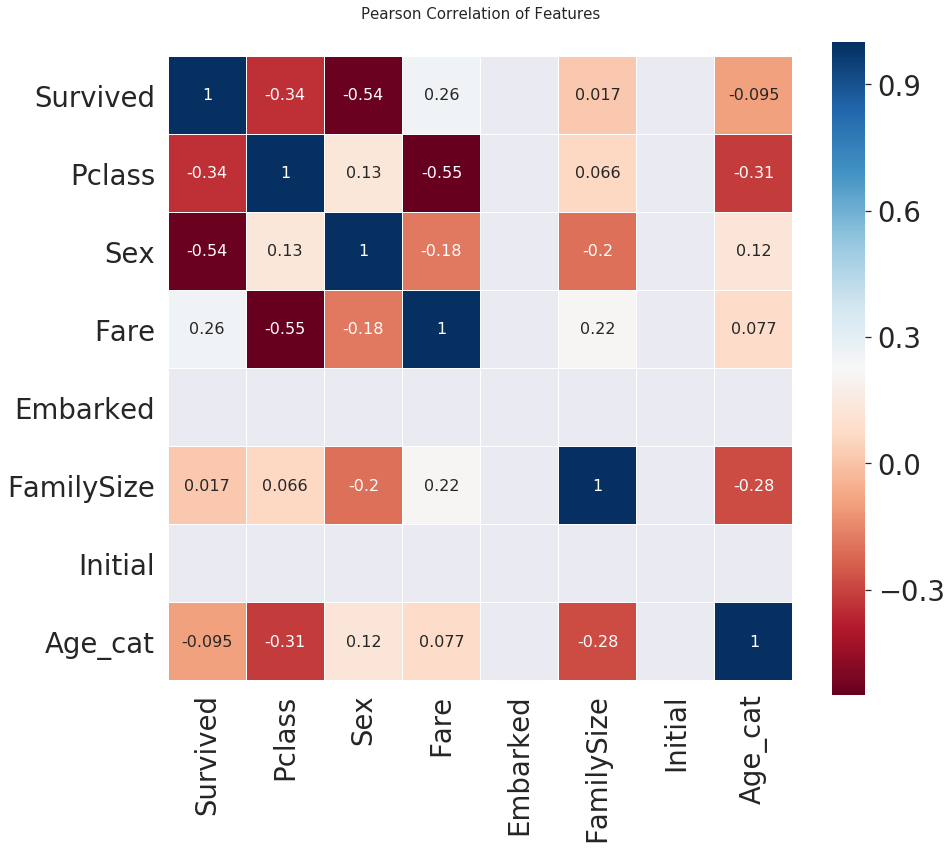

In [93]:
heatmap_data = train_data[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data   #오류 발생,,,,,

In [94]:
train_data = pd.get_dummies(train_data, columns=['Initial'], prefix='Initial')  #원핫인코딩 사용하기
test_data = pd.get_dummies(test_data, columns=['Initial'], prefix='Initial')

In [95]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,NaN,2,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,NaN,2,3
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,NaN,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,NaN,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,NaN,1,3


In [97]:
train_data = pd.get_dummies(train_data, columns=['Embarked'], prefix='Embarked') #위와 동일하게 원핫인코딩 사용
test_data = pd.get_dummies(test_data, columns=['Embarked'], prefix='Embarked')

#히트맵 때도 그렇고'Embarked' 데이터에 오류가 있는 것으로 예측됨..어디서부터 잘못된걸까?

KeyError: "None of [Index(['Embarked'], dtype='object')] are in the [columns]"

In [ ]:
df_train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [98]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Age_cat
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1,3
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2,4
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1,6
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,1,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,3,2


sklearn 사용하기

In [99]:
#sklearn 사용하기 위한 라이브러리 설치
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import train_test_split 

In [101]:
X_train = train_data.drop('Survived', axis=1).values
target_label = train_data['Survived'].values
X_test = test_data.values

In [102]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2018)

In [103]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

ValueError: could not convert string to float: 'Chaffee, Mr. Herbert Fuller'

In [104]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

NameError: name 'prediction' is not defined

In [105]:
from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test_data.columns)

#랜덤포레스트에 쓰일 데이터들이 아직 핏되지 않음

NotFittedError: This RandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [107]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

NameError: name 'Series_feat_imp' is not defined

<Figure size 576x576 with 0 Axes>

In [108]:
submission = pd.read_csv('../input/gender_submission.csv') #csv파일로 저장
submission.head()

FileNotFoundError: [Errno 2] File b'../input/gender_submission.csv' does not exist: b'../input/gender_submission.csv'

In [ ]:
prediction = model.predict(X_test)
submission['Survived'] = prediction

In [ ]:
submission.to_csv('./my_first_submission.csv', index=False)